In [3]:
# Sample code for generation of first example 
%matplotlib notebook
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
img = mpimg.imread('./Images/backyard_v1.png')

In [4]:
x = np.linspace(-20, 20, 41) 
y = np.linspace(-20, 20, 41)  
x_1, y_1 = np.meshgrid(x, y) 

In [5]:
coords_x = []
coords_y = []

In [6]:
def onclick(event):
    x_val = round(event.xdata)
    y_val = round(event.ydata)
    coords_x.append(x_val)
    coords_y.append(y_val)
    return 

<IPython.core.display.Javascript object>


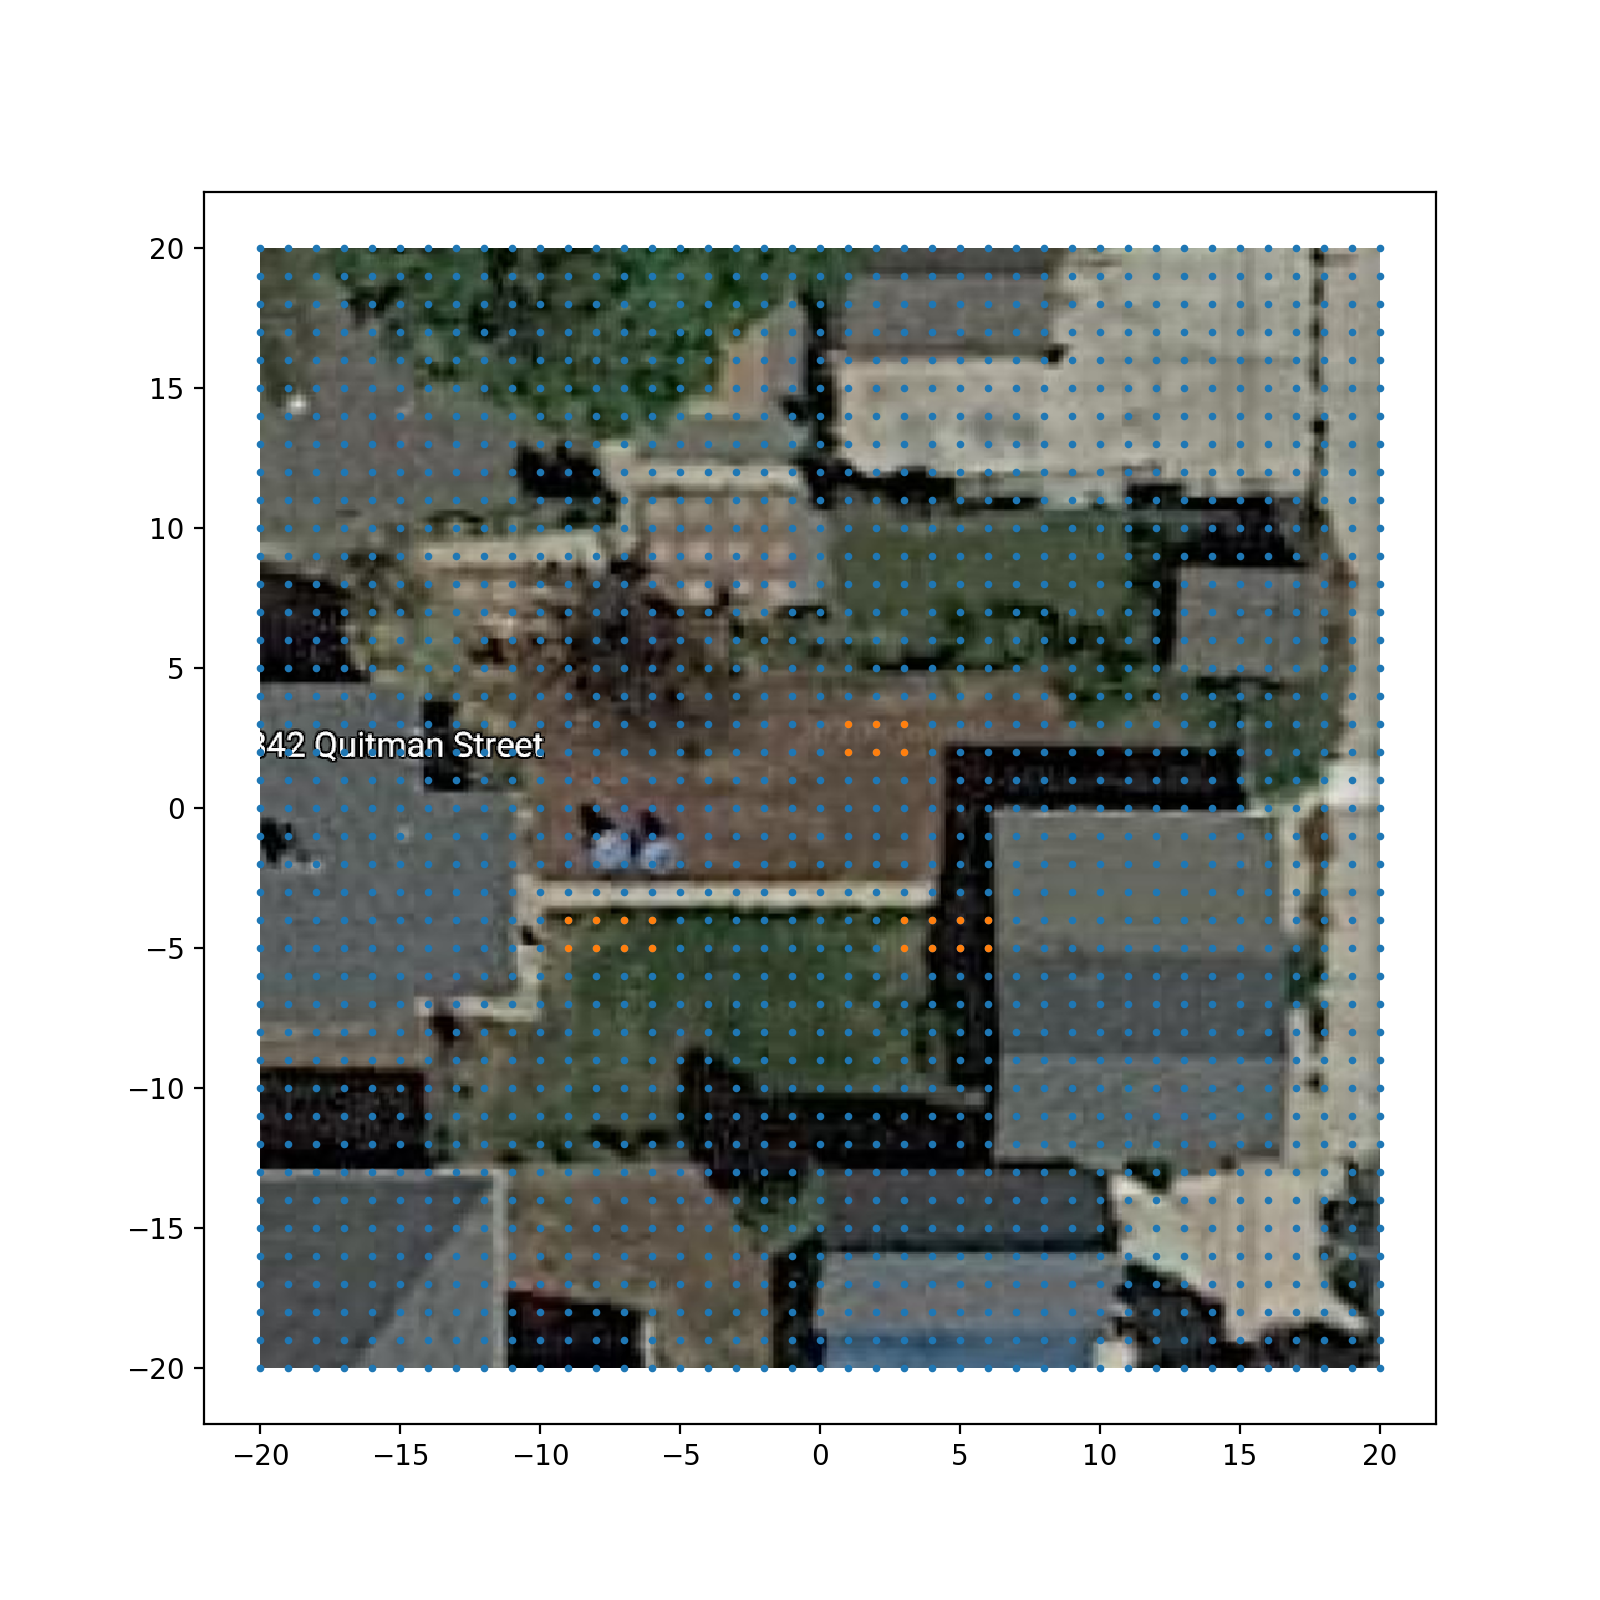

In [8]:
fig = plt.figure(num=None, figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(x_1,y_1,zorder=1, s=3)
plt.imshow(img,zorder=0, extent=[-20, 20, -20, 20])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()


In [9]:
print(coords_x)

[3.0, 4.0, 5.0, 6.0, 3.0, 4.0, 5.0, 6.0, -8.0, -9.0, -9.0, -8.0, -7.0, -6.0, -6.0, -7.0, 1.0, 2.0, 3.0, 3.0, 2.0, 1.0]


In [10]:
print(coords_y)

[-4.0, -4.0, -4.0, -4.0, -5.0, -5.0, -5.0, -5.0, -4.0, -4.0, -5.0, -5.0, -5.0, -5.0, -4.0, -4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0]


In [11]:
plt.scatter(coords_x,coords_y,zorder=2, s=3)
plt.show()

In [12]:
lawny_origin = [-2,-4]

In [13]:
from scipy.spatial import distance

spray_rang_min = 0 #these will eventually be looped through for each power setting this just assumes one loop large spray
spray_rang_max = 20
active_phi = []

length_x = len(coords_x)
for i in range(length_x):
    xy_coords = [coords_x[i],coords_y[i]]
    dist_x = coords_x[i] - lawny_origin[0]
    dist_y = coords_y[i] - lawny_origin[0]
    dist_h = distance.euclidean(lawny_origin,xy_coords)
    if spray_rang_min < dist_h <= spray_rang_max:
        #calculate the angle, using north as axis of ref
        phi = np.arctan2(dist_y, dist_x)
        active_phi.append(phi)


In [14]:
print(active_phi)

[-0.3805063771123649, -0.3217505543966422, -0.27829965900511133, -0.24497866312686414, -0.5404195002705842, -0.4636476090008061, -0.40489178628508343, -0.35877067027057225, -2.819842099193151, -2.8632929945846817, -2.7367008673047097, -2.677945044588987, -2.601173153319209, -2.498091544796509, -2.677945044588987, -2.761086276477428, 1.0303768265243125, 0.8960553845713439, 0.7853981633974483, 0.6747409422235526, 0.7853981633974483, 0.9272952180016122]


In [15]:
active_phi_neg = []
active_phi_pos = []
for x in active_phi:
    if x <= 0:
        if x not in active_phi_neg:
            active_phi_neg.append(x)
    else:
        if x not in active_phi_pos:
            active_phi_pos.append(x)

In [16]:
print(active_phi_neg)
print(active_phi_pos)

[-0.3805063771123649, -0.3217505543966422, -0.27829965900511133, -0.24497866312686414, -0.5404195002705842, -0.4636476090008061, -0.40489178628508343, -0.35877067027057225, -2.819842099193151, -2.8632929945846817, -2.7367008673047097, -2.677945044588987, -2.601173153319209, -2.498091544796509, -2.761086276477428]
[1.0303768265243125, 0.8960553845713439, 0.7853981633974483, 0.6747409422235526, 0.9272952180016122]


In [17]:
active_phi_neg.sort(reverse=True)
active_phi_pos.sort(reverse=True)

cw_sort_angles = []
cw_sort_angles.extend(active_phi_neg)
cw_sort_angles.extend(active_phi_pos)
print(cw_sort_angles)

[-0.24497866312686414, -0.27829965900511133, -0.3217505543966422, -0.35877067027057225, -0.3805063771123649, -0.40489178628508343, -0.4636476090008061, -0.5404195002705842, -2.498091544796509, -2.601173153319209, -2.677945044588987, -2.7367008673047097, -2.761086276477428, -2.819842099193151, -2.8632929945846817, 1.0303768265243125, 0.9272952180016122, 0.8960553845713439, 0.7853981633974483, 0.6747409422235526]


In [18]:
#define min and max of each on section
on_off = []

#set first min value
on_off.append(cw_sort_angles[0])

length_cw_angles = len(cw_sort_angles) - 1

for t in range(length_cw_angles):
    j = t+1
    angle_to_next = np.absolute(cw_sort_angles[j] - cw_sort_angles[t])
    if angle_to_next > .3:
        on_off.append(cw_sort_angles[t])
        on_off.append(cw_sort_angles[j])

#set end angle
if cw_sort_angles[length_cw_angles] not in on_off:
    on_off.append(cw_sort_angles[length_cw_angles])

print(on_off)


[-0.24497866312686414, -0.5404195002705842, -2.498091544796509, -2.8632929945846817, 1.0303768265243125, 0.6747409422235526]


In [19]:
#convert on/off from confusing polar coordinates to simple radians from origin 0 to 2pi
on_off_simple = []
for x in on_off:
    if x <= 0:
        on_off_simple.append(np.absolute(x))
    else:
        on_off_simple.append((np.pi-x) + np.pi)

print(on_off_simple)

[0.24497866312686414, 0.5404195002705842, 2.498091544796509, 2.8632929945846817, 5.252808480655274, 5.608444364956034]


In [22]:
#convert on/off to steps 200 steps per 2pi rad
on_off_steps = []
conv_val = 200/(2*np.pi)
for x in on_off_simple:
    intx = int(x*conv_val)
    on_off_steps.append(intx)

print(on_off_steps)

[7, 17, 79, 91, 167, 178]


In [47]:
#convert to actual step amounts between sections to send to arduino
arduino_steps = []

for i in range(len(on_off_steps)+1):
    if i == 0:
        step = on_off_steps[0];
        arduino_steps.append(step)
    elif i == len(on_off_steps):
        step = 200 - on_off_steps[i-1]
        arduino_steps.append(step)
    else:
        step = on_off_steps[i] - on_off_steps[i-1]
        arduino_steps.append(step)

print(arduino_steps)

[7, 10, 62, 12, 76, 11, 22]


In [72]:
# having issues here trying to figure out how to walk through the for loop but wait for a response 
# before I continue on to the next step......

import serial
import time
if __name__ == '__main__':
    ser = serial.Serial('/dev/cu.usbmodem14101', 9600, timeout=1)
    ser.flush()
    
    while True:
        count = 1
        step_values = bytearray(arduino_steps)
        for step in step_values:
            ready = ser.read()
            if ready != b'':
                if count % 2 == 0: #even equals slow watering
                    print("sending watering value", step)
                    ser.write(b'W%d' %step) #run on "W" watering mode
                    ser.write(b"Z")
                    time.sleep(2)
                    ready = b''
                    count += 1
                else:
                    print("sending no water value", step)
                    ser.write(b'N%d' %step) #run on "N" no-watering mode
                    ser.write(b"Z")
                    time.sleep(2)
                    ready = b''
                    count += 1
                print("breaking")
                break

KeyboardInterrupt: 

In [57]:
import time
from pySerialTransfer import pySerialTransfer as txfer


if __name__ == '__main__':
    try:
        link = txfer.SerialTransfer('/dev/cu.usbmodem14101')
        
        link.open()
        time.sleep(2) # allow some time for the Arduino to completely reset
        
        while True:
            send_size = 0
            
            ###################################################################
            # Send a list
            ###################################################################
            list_ = on_off_steps
            list_size = link.tx_obj(list_)
            send_size = list_size
            
            ###################################################################
            # Transmit all the data to send in a single packet
            ###################################################################
            link.send(send_size)
            
            ###################################################################
            # Wait for a response and report any errors while receiving packets
            ###################################################################
            while not link.available():
                if link.status < 0:
                    if link.status == txfer.CRC_ERROR:
                        print('ERROR: CRC_ERROR')
                    elif link.status == txfer.PAYLOAD_ERROR:
                        print('ERROR: PAYLOAD_ERROR')
                    elif link.status == txfer.STOP_BYTE_ERROR:
                        print('ERROR: STOP_BYTE_ERROR')
                    else:
                        print('ERROR: {}'.format(link.status))
            
            ###################################################################
            # Parse response string
            ###################################################################
            rec_str_   = link.rx_obj(obj_type=type(str_),
                                     obj_byte_size=str_size,
                                     start_pos=list_size)
            
            
            ###################################################################
            # Display the received data
            ###################################################################
            print('SENT: {}'.format(list_))
            print('RCVD: {}'.format(rec_str_))
            print(' ')
    
    except KeyboardInterrupt:
        try:
            link.close()
        except:
            pass
    
    except:
        import traceback
        traceback.print_exc()
        
        try:
            link.close()
        except:
            pass

Traceback (most recent call last):
  File "<ipython-input-57-fec28bb4095c>", line 46, in <module>
    start_pos=list_size)
  File "/Users/bretthileman/opt/anaconda3/lib/python3.7/site-packages/pySerialTransfer/pySerialTransfer.py", line 257, in rx_obj
    buff = bytes(self.rxBuff[start_pos:(start_pos+obj_byte_size)])
TypeError: 'str' object cannot be interpreted as an integer


In [19]:
#old simulation code

def no_lawn(steps):
    rpm_off = 10
    steps_per_min = rpm_off * 200
    steps_per_sec = steps_per_min/60
    #first inform the arduino that this is a no lawn area ie move quick
    #ser.write(b'0')
    time.sleep(1)
    
    #tell arduino how far to rotate stepper
    #ser.write(steps)
    sleep_time = (steps/steps_per_sec) + .5
    time.sleep(sleep_time)
    print('no lawn cycle complete')
    return 

In [20]:
#old simulation code

def lawn(steps):
    rpm_on = 1
    steps_per_min = rpm_on * 200
    steps_per_sec = steps_per_min/60
    #first inform the arduino to that this is a lawn area ie move slow
    #ser.write(b'lawn')
    time.sleep(1)
    
    #tell arduino how far to rotate stepper
    #ser.write(steps)
    sleep_time = (steps/steps_per_sec) + .5
    time.sleep(sleep_time)
    print('lawn cycle complete')
    return 

In [21]:
#old simulation code

#make step assignments to send to arduino
# stepper is 1.8 deg per step = 200 per rotation
# 1.8 deg = 0.0314 rad

#need to start from origin to first point, off -> on -> off
length_on_off_simple = len(on_off_simple)
step_ang = .0314

#0 is off lawn  1 is on lawn
switch = 0
serialMessage = ""


for k in range(length_on_off_simple):
    #account for handling the first point
    if k == 0:        
        steps = (0 + on_off_simple[k])/step_ang
        no_lawn(steps)
        switch = 1
        
    #account for last step
    elif k == length_on_off_simple:
        steps = (2*np.pi - on_off_simple[k])/step_ang
        no_lawn(steps)
        switch = 0
 
    else:
        if switch == 0:
            #off lawn
            steps = (on_off_simple[k] - on_off_simple[k-1])/step_ang
            no_lawn(steps)
            switch = 1
        else:
            #on lawn
            steps = (on_off_simple[k] - on_off_simple[k-1])/step_ang
            lawn(steps)
            switch = 0

print('all done')

no lawn cycle complete
lawn cycle complete
no lawn cycle complete
lawn cycle complete
no lawn cycle complete
lawn cycle complete
no lawn cycle complete
lawn cycle complete
all done
